# 라이브러리

In [323]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# 수집

In [324]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combine = [train, test]

# EDA(탐색)

In [325]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [326]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [327]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [328]:
train.info()
print('='*50)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [329]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [330]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Heininen, Miss. Wendla Maria",male,347082,B96 B98,S
freq,1,577,7,4,644


In [331]:
train[['Pclass','Survived']].groupby('Pclass',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [332]:
train[['Sex','Survived']].groupby('Sex',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [333]:
train[['SibSp','Survived']].groupby('SibSp',as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [334]:
train[['Parch','Survived']].groupby('Parch',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


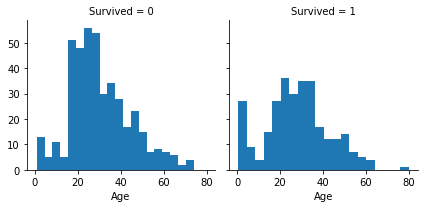

In [335]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist,'Age',bins=20)

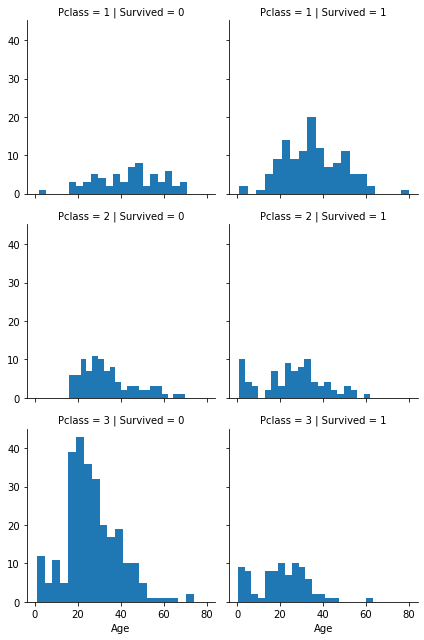

In [336]:
grid = sns.FacetGrid(train, row='Pclass', col='Survived')
grid.map(plt.hist,'Age',bins=20)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


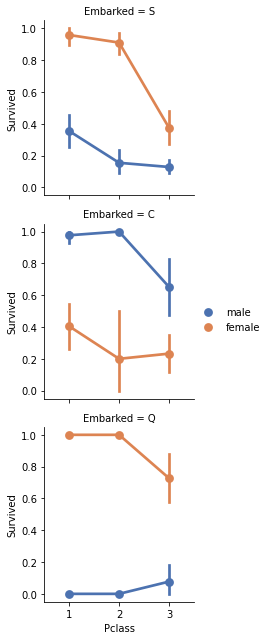

In [337]:
grid = sns.FacetGrid(train, row='Embarked')
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
grid.add_legend()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


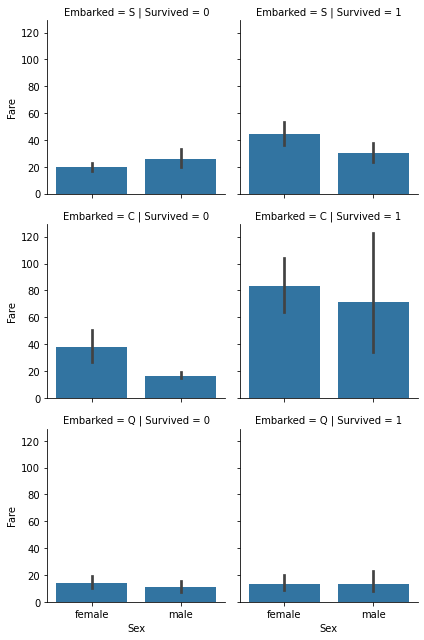

In [338]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived')
grid.map(sns.barplot,'Sex','Fare')

# 전처리(가공)

In [339]:
print('before',train.shape,test.shape,combine[0].shape,combine[1].shape)

train = train.drop(['Ticket','Cabin'],axis=1)
test = test.drop(['Ticket','Cabin'],axis=1)
combine = [train, test]

print('after',train.shape,test.shape,combine[0].shape,combine[1].shape)

before (891, 12) (418, 11) (891, 12) (418, 11)
after (891, 10) (418, 9) (891, 10) (418, 9)


In [340]:
for dataset in combine:
    dataset['Title'] = dataset['Name'].str.extract(' ([a-zA-Z]+)\. ',expand=False)

train['Title'].unique()
pd.crosstab(train['Title'],train['Sex'])
    

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [341]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt',
                                                 'Col',
                                                 'Countess',
                                                 'Don',
                                                 'Dr',
                                                 'Jonkheer',
                                                 'Lady',
                                                 'Major',
                                                 'Rev',
                                                 'Sir'
                                                ],'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
    
train[['Title','Survived']].groupby('Title',as_index=False).mean().sort_values(by='Survived',ascending=False)    

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [342]:
print(train['Title'].head())
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
print(train['Title'].head())


0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object
0    1
1    3
2    2
3    3
4    1
Name: Title, dtype: int64


In [343]:
train = train.drop(['Name','PassengerId'],axis=1)
test = test.drop('Name',axis=1)
combine = [train,test]
train.shape, test.shape

((891, 9), (418, 9))

In [344]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'male':0, 'female':1})
    
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


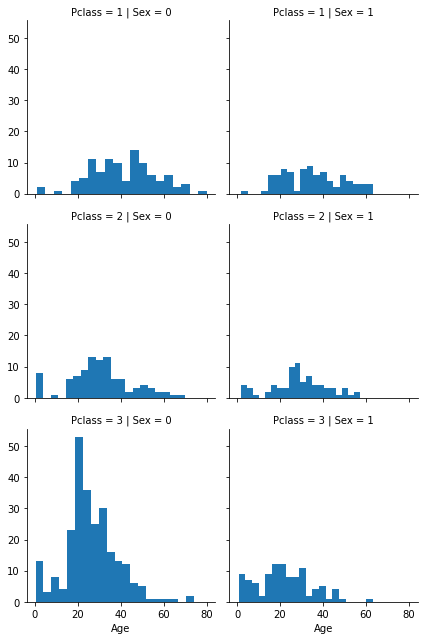

In [345]:
grid = sns.FacetGrid(train, row='Pclass', col='Sex')
grid.map(plt.hist, 'Age', bins=20)

In [346]:
guess_ages = np.zeros((2,4))
guess_ages

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [347]:
for dataset in combine:
    for i in range(0,2):
        for j in range(1,4):
            guess_age = dataset[(dataset['Sex']==i) 
                               & (dataset['Pclass']==j)]['Age'].dropna().median()
            guess_ages[i,j] = int(guess_age/0.5 + 0.5) * 0.5
            
    for i in range(0,2):
        for j in range(1,4):
            dataset.loc[ (dataset['Sex']==i) & 
                    (dataset['Pclass']==j) &
                   (dataset['Age'].isnull()),'Age'] = guess_ages[i,j]
            

In [348]:
train['Age'].isna().sum()

0

In [349]:
train['Age'] = train['Age'].astype(int)

In [350]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [351]:
train['AgeBand'] = pd.cut(train['Age'],5)

In [352]:
train[['AgeBand','Survived']].groupby('AgeBand',as_index=False).mean().sort_values(by='Survived',ascending=False)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
3,"(48.0, 64.0]",0.434783
2,"(32.0, 48.0]",0.412037
1,"(16.0, 32.0]",0.337374
4,"(64.0, 80.0]",0.090909


In [353]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16,'Age'] = 0
    dataset.loc[ (dataset['Age'] > 16) & (dataset['Age'] <= 32),'Age'] = 1
    dataset.loc[ (dataset['Age'] > 32) & (dataset['Age'] <= 48),'Age'] = 2
    dataset.loc[ (dataset['Age'] > 48) & (dataset['Age'] <= 64),'Age'] = 3
    dataset.loc[ dataset['Age'] > 64,'Age'] = 4

In [354]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [355]:
train = train.drop('AgeBand',axis=1)

In [356]:
combine = [train,test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [357]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [358]:
train[['FamilySize','Survived']].groupby('FamilySize',as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [359]:
for dataset in combine:
    dataset['Alone'] = 0
    dataset.loc[ (dataset['FamilySize'] == 1),'Alone'] = 1

In [360]:
train[['Alone','Survived']].groupby('Alone',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Alone,Survived
0,0,0.505650
1,1,0.303538


In [361]:
train = train.drop(['Parch','SibSp','FamilySize'],axis=1)
test = test.drop(['Parch','SibSp','FamilySize'],axis=1)

In [362]:
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [363]:
for dataset in combine:
    dataset['Age*Class'] = dataset['Age'] * dataset['Pclass']

In [364]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone,Age*Class
0,0,3,0,1,7.2500,S,1,0,3
1,1,1,1,2,71.2833,C,3,0,2
2,1,3,1,1,7.9250,S,2,1,3
3,1,1,1,2,53.1000,S,3,0,2
4,0,3,0,2,8.0500,S,1,1,6


In [365]:
freq_port = train['Embarked'].mode()[0]
freq_port

'S'

In [366]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

In [367]:
train[['Embarked','Survived']].groupby('Embarked',as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [368]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S':0, 'C':1, 'Q':2} )

In [369]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [370]:
test['Fare'].isna().sum()

1

In [371]:
test['Fare'].fillna(test['Fare'].dropna().median(),inplace=True)

In [372]:
test['Fare'].isna().sum()

0

In [373]:
train['FareBand'] = pd.qcut(train['Fare'],4)

In [374]:
train[['FareBand','Survived']].groupby('FareBand',as_index=False).mean()

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [376]:
for dataset in combine:
    dataset.loc[ (dataset['Fare'] <= 7.91),'Fare'] = 0
    dataset.loc[ (dataset['Fare'] > 7.91) & 
                (dataset['Fare'] <= 14.454),'Fare'] = 1
    dataset.loc[ (dataset['Fare'] > 14.454) & 
                (dataset['Fare'] <= 31.0),'Fare'] = 2
    dataset.loc[ (dataset['Fare'] > 31.0),'Fare'] = 3

In [377]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone,Age*Class,FareBand
0,0,3,0,1,0.0,0,1,0,3,"(-0.001, 7.91]"
1,1,1,1,2,3.0,1,3,0,2,"(31.0, 512.329]"
2,1,3,1,1,1.0,0,2,1,3,"(7.91, 14.454]"
3,1,1,1,2,3.0,0,3,0,2,"(31.0, 512.329]"
4,0,3,0,2,1.0,0,1,1,6,"(7.91, 14.454]"


In [378]:
train['Fare'] = train['Fare'].astype(int)
test['Fare'] = test['Fare'].astype(int)

In [379]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone,Age*Class,FareBand
0,0,3,0,1,0,0,1,0,3,"(-0.001, 7.91]"
1,1,1,1,2,3,1,3,0,2,"(31.0, 512.329]"
2,1,3,1,1,1,0,2,1,3,"(7.91, 14.454]"
3,1,1,1,2,3,0,3,0,2,"(31.0, 512.329]"
4,0,3,0,2,1,0,1,1,6,"(7.91, 14.454]"


In [380]:
train = train.drop('FareBand',axis=1)

In [381]:
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


In [382]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Alone,Age*Class
0,892,3,0,2.0,0,2,1.0,1,6.0
1,893,3,1,2.0,0,0,3.0,0,6.0
2,894,2,0,3.0,1,2,1.0,1,6.0
3,895,3,0,1.0,1,0,1.0,1,3.0
4,896,3,1,1.0,1,0,3.0,0,3.0


In [383]:
test['Age'] = test['Age'].astype(int)
test['Title'] = test['Title'].astype(int)
test['Age*Class'] = test['Age*Class'].astype(int)

In [384]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Alone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3


# 모델링(분석)

In [385]:
x_train = train.drop('Survived',axis=1) 
y_train = train['Survived']
x_test = test.drop('PassengerId',axis=1)
x_train.shape, y_train.shape, x_test.shape

((891, 8), (891,), (418, 8))

In [392]:
model1 = LogisticRegression()
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)

score1 = round( model1.score(x_train,y_train)*100, 2)

In [393]:
model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)
y_pred = model2.predict(x_test)

score2 = round( model2.score(x_train,y_train)*100,2)

In [394]:
model3 = RandomForestClassifier(n_estimators=100)
model3.fit(x_train,y_train)
y_pred = model3.predict(x_test)

score3 = round( model3.score(x_train,y_train)*100,2)

In [397]:
results = pd.DataFrame({'Model':['Logistic Regression',
                               'DecisionTree',
                               'Random Forest'],
                      'Score':[score1,score2,score3]})

results.sort_values(by='Score',ascending=False)

,Model,Score
1,DecisionTree,86.64
2,Random Forest,86.64
0,Logistic Regression,81.37


In [401]:
submission = pd.DataFrame( {'PassengerId':test['PassengerId'],
                           'Survived':y_pred} )

In [405]:
submission.to_csv('my_submission.csv',index=False)